In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg



In [13]:


# Here is your draw_boxes function from the previous exercise
def draw_boxes(img, bboxes, color=(0, 0, 255), thick=6):
    # Make a copy of the image
    imcopy = np.copy(img)
    # Iterate through the bounding boxes
    for bbox in bboxes:
        # Draw a rectangle given bbox coordinates
        cv2.rectangle(imcopy, bbox[0], bbox[1], color, thick)
    # Return the image copy with boxes drawn
    return imcopy
    
    
# Define a function that takes an image,
# start and stop positions in both x and y, 
# window size (x and y dimensions),  
# and overlap fraction (for both x and y)
def slide_window(img, x_start_stop=[None, None], y_start_stop=[None, None], 
                    xy_window=(64, 64), xy_overlap=(0.5, 0.5)):
    # If x and/or y start/stop positions not defined, set to image size
    if x_start_stop == None and y_start_stop == None:
        x_start_stop = [0,img.shape[1]]
        y_start_stop = [0, img.shape[0]]
        
    # Compute the span of the region to be searched    
    # Compute the number of pixels per step in x/y
    x_pixels_per_step = xy_window[0] * xy_overlap[0]
    y_pixels_per_step = xy_window[1] * xy_overlap[1]
    # Compute the number of windows in x/y
    x_windows = 1 + (img.shape[1] - xy_window[0])/x_pixels_per_step
    y_windows = 1 + (img.shape[0] - xy_window[1])/y_pixels_per_step
    print(x_windows, y_windows)
    # Initialize a list to append window positions to
    window_list = []
    # Loop through finding x and y window positions
    #     Note: you could vectorize this step, but in practice
    #     you'll be considering windows one by one with your
    #     classifier, so looping makes sense
        # Calculate each window position
        # Append window position to list
    # Return the list of windows
    return window_list



(707, 1259, 3)
18.671875 10.046875


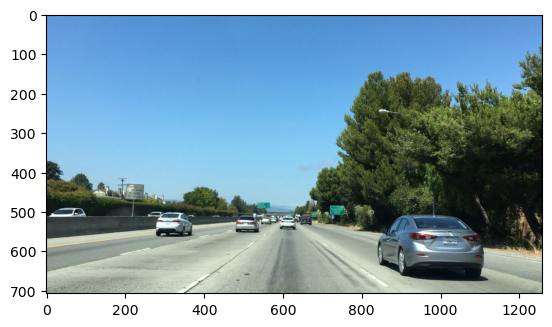

In [14]:
image = mpimg.imread('bbox-example-image.jpg')
print(image.shape)
windows = slide_window(image, x_start_stop=[None, None], y_start_stop=[None, None], 
                    xy_window=(128, 128), xy_overlap=(0.5, 0.5))
                       
window_img = draw_boxes(image, windows, color=(0, 0, 255), thick=6)                    
plt.imshow(window_img)